(8124, 23)

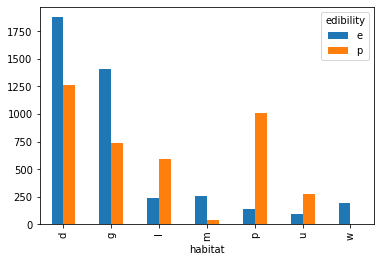

In [35]:
import pandas as pd
df = pd.read_csv("data/agaricus-lepiota.data")

df.sort_values(by=['edibility', 'habitat'])[['edibility', 'habitat']]

a = df.groupby(['habitat', 'edibility']).size()
a = a.unstack()
a.plot.bar()


<AxesSubplot:xlabel='cap-color'>

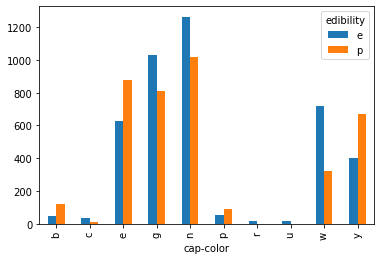

In [30]:
b = df.groupby(['cap-color', 'edibility']).size()
b = b.unstack()
b.plot.bar()

<AxesSubplot:xlabel='odor'>

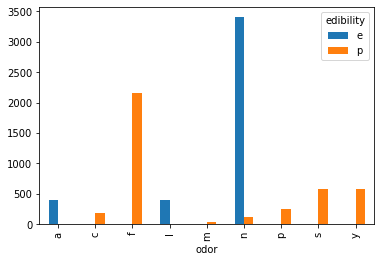

In [31]:
c = df.groupby(['odor', 'edibility']).size()
c = c.unstack()
c.plot.bar()

In [55]:
df_dc = pd.get_dummies(df, columns=['odor', 'edibility'])